# <웹크롤링>

In [34]:
from bs4 import BeautifulSoup as bs
import requests

In [ ]:
#  아나콘다 prompt 실행한후
# conda install -c conda-forge selenium
# 위 방법 안되면
# 주피터에서 !pip 설치 혹은 prompt에서 pip install selenium

In [35]:
# 웹 드라이버 라이브러리
from selenium import webdriver

In [36]:
driver = webdriver.Chrome('C:/ChromeDriver_exe/chromedriver102.exe')
# 제어권 우리에게 있는 크롬화면 하나 뜸 
# 크롬 버전 확인해서 크롬 드라이버 설치 

C:\Users\82102\AppData\Local\Temp\ipykernel_10064\1164384640.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/ChromeDriver_exe/chromedriver102.exe')


In [37]:
# 명령
driver.get('http://www.naver.com')

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.115 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:u
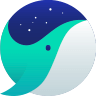
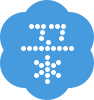

In [17]:
html = driver.page_source
html

In [4]:
html = '''
<html>
<head>
<title>테스트 페이지 입니다</title>
</head>
<body>
    <h1> 우리동네시장</h1>
    <div class = 'sale'>
        <p id='fruits1' class='fruits'>
            <span class = 'name'> 바나나 </span>
            <span class = 'price'> 3000원 </span>
            <span class = 'inventory'> 500개 </span>
            <span class = 'store'> 가나다상회 </span>
            <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
        </p>
    </div>
    <div class = 'prepare'>
        <p id='fruits2' class='fruits'>
            <span class ='name'> 파인애플 </span>
        </p>
    </div>
</body>
</html>
'''

html

"\n<html>\n<head>\n<title>테스트 페이지 입니다</title>\n</head>\n<body>\n    <h1> 우리동네시장</h1>\n    <div class = 'sale'>\n        <p id='fruits1' class='fruits'>\n            <span class = 'name'> 바나나 </span>\n            <span class = 'price'> 3000원 </span>\n            <span class = 'inventory'> 500개 </span>\n            <span class = 'store'> 가나다상회 </span>\n            <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>\n        </p>\n    </div>\n    <div class = 'prepare'>\n        <p id='fruits2' class='fruits'>\n            <span class ='name'> 파인애플 </span>\n        </p>\n    </div>\n</body>\n</html>\n"

In [8]:
# 의미부여 
soup = bs(html, "html.parser")
soup


<html>
<head>
<title>테스트 페이지 입니다</title>
</head>
<body>
<h1> 우리동네시장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>

## HTML 정보찾기  → 태그이름 활용

In [9]:
# 태그 중에 span 이라는 이름을 가지는 모든 것 조회  html 파일은 soup.select 함수 
# xml 파일은 soup.find_all 
soup.select('span') # <- 리스트형태 

[<span class="name"> 바나나 </span>,
 <span class="price"> 3000원 </span>,
 <span class="inventory"> 500개 </span>,
 <span class="store"> 가나다상회 </span>,
 <span class="name"> 파인애플 </span>]

In [10]:
soup.select('span')[1] # <- 리스트형태라 인덱스번호로 접근 

<span class="price"> 3000원 </span>

In [11]:
# p 태그만 조회
soup.select('p')

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>,
 <p class="fruits" id="fruits2">
 <span class="name"> 파인애플 </span>
 </p>]

     - id를 가지고 있는 태그들은 바로 찾아갈 수 있다 id는 고유한 값, 클래스는 중복 가능 
     - 태그이름 아이디 클래스로 우리가 원하는 정보 찾아간다 
     - 클래스는 . 으로 접근 , id는 #  (접근자는 항상 왼쪽)



In [12]:
#id = fruits1 정보 접근 
soup.select('#fruits1')

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [13]:
soup.select('.price')

[<span class="price"> 3000원 </span>]

In [14]:
# span 태그 중 클래스 값이 name인것 조회 
soup.select('span.name')

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

In [20]:
# 한단계 바로 밑을 가르치는 접근자 > (바로밑에있는 직계자식의미)
soup.select('#fruits1 > span.name')

[<span class="name"> 바나나 </span>]

 - 정리

 
    태그 : 태그명
    클래스 : .클래스명
    아이디 : #아이디명
    자식 : 부모명 > 자식명(바로밑 직계)
    자손 : 부모명(space)자손명 


In [22]:
# 태그명이 div 이면서 class 이름이 sale인 태그의 자식중에 아이디 이름이 fruits1인 
# 태그 밑에 있는 자식에 대한 태그명이 span 이면서 클래스 이름이 name인 태그 모두 찾기 
soup.select('div.sale > #fruits1 > span.name')

[<span class="name"> 바나나 </span>]

In [23]:
soup.select('div.sale span.name') # 중간에 스페이스 

[<span class="name"> 바나나 </span>]

In [24]:
soup.select('div.sale span.name')[0].text

' 바나나 '

In [25]:
# 클래스 속성의 값 가져오기 
# soup.select('div.sale span.name')[0] 
soup.select('div.sale span.name')[0]['class']

['name']

In [26]:
# a 태그 ( 이벤트 태그 ) : 링크걸어주는 기능, href 속성에 들어있는 값으로 링크이동  
soup.select('a')

[<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>]

In [27]:
# href 속성값 조회 
soup.select('a')[0]['href']

'http://bit.ly/forPlaywithData'

https://www.google.com/robots.txt 
 allow 값만 접근가능

# 멜론 노래 순위 정보 크롤링

In [41]:
url = 'http://www.melon.com/chart/index.htm'

In [42]:
driver.get(url)
html = driver.page_source
html

'<html lang="ko" class="narrow-screen"><head>\n\t\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\n\n\t\n\n\t\n\n\t<title>멜론차트&gt;TOP100&gt;멜론</title>\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널">\n\t<meta name="description" content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!">\n\t<meta name="naver-site-verification" content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b">\n\t<meta name="google-site-verification" content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc">\n\t<meta property="fb:app_id" content="357952407588971">\n\t<meta property="og:title" content="Melon">\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png">\n\t<meta property="og:description" content="음악이 필요한 순간, 멜론">\n\t<meta property="og:url" content="http://www.melon.com/

In [43]:
# 의미부여
soup = bs(html, "html.parser")
soup

<html class="narrow-screen" lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" pr

In [135]:
# 곡찾기 
# 찾고싶은 내용 ctrl+f 로 검색해서 찾기 
soup.select('div.wrap_song_info a')

[<a href="javascript:melon.play.playSong('1000002721',34847378);" title="LOVE DIVE 재생">LOVE DIVE</a>,
 <a href="javascript:melon.link.goArtistDetail('3055146');" title="IVE (아이브) - 페이지 이동">IVE (아이브)</a>,
 <a href="javascript:melon.link.goArtistDetail('3055146');" title="IVE (아이브) - 페이지 이동">IVE (아이브)</a>,
 <a href="javascript:melon.link.goAlbumDetail('10909179');" title="LOVE DIVE - 페이지 이동">LOVE DIVE</a>,
 <a href="javascript:melon.play.playSong('1000002721',34754292);" title="TOMBOY 재생">TOMBOY</a>,
 <a href="javascript:melon.link.goArtistDetail('2137482');" title="(여자)아이들 - 페이지 이동">(여자)아이들</a>,
 <a href="javascript:melon.link.goArtistDetail('2137482');" title="(여자)아이들 - 페이지 이동">(여자)아이들</a>,
 <a href="javascript:melon.link.goAlbumDetail('10890384');" title="I NEVER DIE - 페이지 이동">I NEVER DIE</a>,
 <a href="javascript:melon.play.playSong('1000002721',34997078);" title="That That (prod. &amp; feat. SUGA of BTS) 재생">That That (prod. &amp; feat. SUGA of BTS)</a>,
 <a href="javascript:melon.l

In [120]:
# 좋아요 수 찾기 
soup.select('span.cnt')

[<span class="cnt">셔플듣기</span>,
 <span class="cnt">전체듣기</span>,
 <span class="cnt">듣기</span>,
 <span class="cnt">담기</span>,
 <span class="cnt">다운</span>,
 <span class="cnt"><span class="eng">FLAC</span></span>,
 <span class="cnt">선물</span>,
 <span class="cnt">
 <span class="none">총건수</span>
 143,915</span>,
 <span class="cnt">
 <span class="none">총건수</span>
 187,946</span>,
 <span class="cnt">
 <span class="none">총건수</span>
 97,369</span>,
 <span class="cnt">
 <span class="none">총건수</span>
 132,345</span>,
 <span class="cnt">
 <span class="none">총건수</span>
 98,065</span>,
 <span class="cnt">
 <span class="none">총건수</span>
 64,805</span>,
 <span class="cnt">
 <span class="none">총건수</span>
 164,694</span>,
 <span class="cnt">
 <span class="none">총건수</span>
 126,442</span>,
 <span class="cnt">
 <span class="none">총건수</span>
 52,375</span>,
 <span class="cnt">
 <span class="none">총건수</span>
 274,068</span>,
 <span class="cnt">
 <span class="none">총건수</span>
 72,750</span>,
 <span class="cn

In [119]:
# 좋아요수 찾기 2 
like_sum = soup.select('span.cnt')
del like_sum[0:7]
like_sum[1].text[5:14]

'187,946'

In [153]:
# 앨범명 찾기 
soup.select('div.wrap_song_info a')


[<a href="javascript:melon.play.playSong('1000002721',34847378);" title="LOVE DIVE 재생">LOVE DIVE</a>,
 <a href="javascript:melon.link.goArtistDetail('3055146');" title="IVE (아이브) - 페이지 이동">IVE (아이브)</a>,
 <a href="javascript:melon.link.goArtistDetail('3055146');" title="IVE (아이브) - 페이지 이동">IVE (아이브)</a>,
 <a href="javascript:melon.link.goAlbumDetail('10909179');" title="LOVE DIVE - 페이지 이동">LOVE DIVE</a>,
 <a href="javascript:melon.play.playSong('1000002721',34754292);" title="TOMBOY 재생">TOMBOY</a>,
 <a href="javascript:melon.link.goArtistDetail('2137482');" title="(여자)아이들 - 페이지 이동">(여자)아이들</a>,
 <a href="javascript:melon.link.goArtistDetail('2137482');" title="(여자)아이들 - 페이지 이동">(여자)아이들</a>,
 <a href="javascript:melon.link.goAlbumDetail('10890384');" title="I NEVER DIE - 페이지 이동">I NEVER DIE</a>,
 <a href="javascript:melon.play.playSong('1000002721',34997078);" title="That That (prod. &amp; feat. SUGA of BTS) 재생">That That (prod. &amp; feat. SUGA of BTS)</a>,
 <a href="javascript:melon.l

In [155]:
# except ZeroDivisionError 있다고 가정할떄 
# 사실은 없음 데헷 
for i in range(0, 40 ,4):
    try :
        print('곡 : '+ soup.select('div.wrap_song_info a')[i].text)
        print('가수 : '+soup.select('div.wrap_song_info a')[i+1].text)
       
        if i == 0 : 
            print('앨범명 : ' + soup.select('div.wrap_song_info a')[3].text)
        else:
            print('앨범명 : ' + soup.select('div.wrap_song_info a')[i+3].text)
        print('좋아요 수 : ' + like_sum[i//4].text[5:14])
    except ZeroDivisionError:
        print('곡 : '+ soup.select('div.wrap_song_info a')[i].text)
        print('가수 : '+soup.select('div.wrap_song_info a')[i+1].text)
        
        if i ==0 : 
            print('앨범명 : ' + soup.select('div.wrap_song_info a')[3].text)
        else:
            print('앨범명 : ' + soup.select('div.wrap_song_info a')[i+3].text)
        print('좋아요 수 :' + like_sum[i].text[5:14])

        
        

곡 : LOVE DIVE
가수 : IVE (아이브)
앨범명 : LOVE DIVE
좋아요 수 : 143,915
곡 : TOMBOY
가수 : (여자)아이들
앨범명 : I NEVER DIE
좋아요 수 : 187,946
곡 : That That (prod. & feat. SUGA of BTS)
가수 : 싸이 (PSY)
앨범명 : 싸다9
좋아요 수 : 97,369
곡 : 사랑인가 봐
가수 : 멜로망스
앨범명 : 사랑인가 봐 (사내맞선 OST 스페셜 트랙)
좋아요 수 : 132,345
곡 : Yet To Come
가수 : 방탄소년단
앨범명 : Proof
좋아요 수 : 98,065
곡 : 우리들의 블루스
가수 : 임영웅
앨범명 : IM HERO
좋아요 수 : 64,805
곡 : 사랑은 늘 도망가
가수 : 임영웅
앨범명 : 신사와 아가씨 OST Part.2
좋아요 수 : 164,694
곡 : 정이라고 하자 (Feat. 10CM)
가수 : BIG Naughty (서동현)
앨범명 : 정이라고 하자
좋아요 수 : 126,442
곡 : 다시 만날 수 있을까
가수 : 임영웅
앨범명 : IM HERO
좋아요 수 : 52,375
곡 : 봄여름가을겨울 (Still Life)
가수 : BIGBANG (빅뱅)
앨범명 : 봄여름가을겨울 (Still Life)
좋아요 수 : 274,068


In [177]:
for i in range(0, 40 ,4):
    print('곡 : '+ soup.select('div.wrap_song_info a')[i].text)
    print('가수 : '+soup.select('div.wrap_song_info a')[i+1].text)

    if i == 0 : 
        print('앨범명 : ' + soup.select('div.wrap_song_info a')[3].text)
    else:
        print('앨범명 : ' + soup.select('div.wrap_song_info a')[i+3].text)
    print('좋아요 수 : ' + like_sum[i//4].text[5:14])

곡 : LOVE DIVE
가수 : IVE (아이브)
앨범명 : LOVE DIVE
좋아요 수 : 143,915
곡 : TOMBOY
가수 : (여자)아이들
앨범명 : I NEVER DIE
좋아요 수 : 187,946
곡 : That That (prod. & feat. SUGA of BTS)
가수 : 싸이 (PSY)
앨범명 : 싸다9
좋아요 수 : 97,369
곡 : 사랑인가 봐
가수 : 멜로망스
앨범명 : 사랑인가 봐 (사내맞선 OST 스페셜 트랙)
좋아요 수 : 132,345
곡 : Yet To Come
가수 : 방탄소년단
앨범명 : Proof
좋아요 수 : 98,065
곡 : 우리들의 블루스
가수 : 임영웅
앨범명 : IM HERO
좋아요 수 : 64,805
곡 : 사랑은 늘 도망가
가수 : 임영웅
앨범명 : 신사와 아가씨 OST Part.2
좋아요 수 : 164,694
곡 : 정이라고 하자 (Feat. 10CM)
가수 : BIG Naughty (서동현)
앨범명 : 정이라고 하자
좋아요 수 : 126,442
곡 : 다시 만날 수 있을까
가수 : 임영웅
앨범명 : IM HERO
좋아요 수 : 52,375
곡 : 봄여름가을겨울 (Still Life)
가수 : BIGBANG (빅뱅)
앨범명 : 봄여름가을겨울 (Still Life)
좋아요 수 : 274,068


In [199]:
# top_10 리스트에 값 담기 
top_10 = []
for i in range(0, 40 ,4): 
    song = soup.select('div.wrap_song_info a')[i].text
    artist= soup.select('div.wrap_song_info a')[i+1].text
    like = like_sum[i//4].text[5:14]
    if i == 0 : 
        album = soup.select('div.wrap_song_info a')[3].text
    else:
        album = soup.select('div.wrap_song_info a')[i+3].text

    top_10.append([song, artist,album,like])

top_10


[['LOVE DIVE', 'IVE (아이브)', 'LOVE DIVE', '143,915'],
 ['TOMBOY', '(여자)아이들', 'I NEVER DIE', '187,946'],
 ['That That (prod. & feat. SUGA of BTS)', '싸이 (PSY)', '싸다9', '97,369'],
 ['사랑인가 봐', '멜로망스', '사랑인가 봐 (사내맞선 OST 스페셜 트랙)', '132,345'],
 ['Yet To Come', '방탄소년단', 'Proof', '98,065'],
 ['우리들의 블루스', '임영웅', 'IM HERO', '64,805'],
 ['사랑은 늘 도망가', '임영웅', '신사와 아가씨 OST Part.2', '164,694'],
 ['정이라고 하자 (Feat. 10CM)', 'BIG Naughty (서동현)', '정이라고 하자', '126,442'],
 ['다시 만날 수 있을까', '임영웅', 'IM HERO', '52,375'],
 ['봄여름가을겨울 (Still Life)', 'BIGBANG (빅뱅)', '봄여름가을겨울 (Still Life)', '274,068']]

In [200]:
# 데이터 프레임에 값 담기 
df_top_10_final=pd.DataFrame()
song_list =[]
artist_list = []
album_list =[]
like_list =[]


for i in range(0, 40 ,4):
    song = soup.select('div.wrap_song_info a')[i].text
    artist= soup.select('div.wrap_song_info a')[i+1].text
    like = like_sum[i//4].text[5:14]
    
    song_list.append(song)
    artist_list.append(artist)
    like_list.append(like)
    if i == 0 : 
        album = soup.select('div.wrap_song_info a')[3].text
        album_list.append(album)
    else:
        album = soup.select('div.wrap_song_info a')[i+3].text
        album_list.append(album)

df_top_10_list=pd.DataFrame({'곡명': song_list,
                            '가수명' : artist_list,
                            '앨범명' : album_list,
                            '좋아요수' : like_list,
                        })

# df_top_10_final = pd.concat([df_top_10_final,df_top_10_list])
    
# df_top_10_final
df_top_10_list


,곡명,가수명,앨범명,좋아요수
0,LOVE DIVE,IVE (아이브),LOVE DIVE,"143,915"
1,TOMBOY,(여자)아이들,I NEVER DIE,"187,946"
2,That That (prod. & feat. SUGA of BTS),싸이 (PSY),싸다9,"97,369"
3,사랑인가 봐,멜로망스,사랑인가 봐 (사내맞선 OST 스페셜 트랙),"132,345"
4,Yet To Come,방탄소년단,Proof,"98,065"
5,우리들의 블루스,임영웅,IM HERO,"64,805"
6,사랑은 늘 도망가,임영웅,신사와 아가씨 OST Part.2,"164,694"
7,정이라고 하자 (Feat. 10CM),BIG Naughty (서동현),정이라고 하자,"126,442"
8,다시 만날 수 있을까,임영웅,IM HERO,"52,375"
9,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life),"274,068"


In [223]:
# rank = [1,2,3,4,5,6,7,8,9,10]
# for i in rank:
#     df_top_10_list['순위'].loc() = i
#     print(df_top_10_list)

df_top_10_list['곡명']

0                                LOVE DIVE
1                                   TOMBOY
2    That That (prod. & feat. SUGA of BTS)
3                                   사랑인가 봐
4                              Yet To Come
5                                 우리들의 블루스
6                                사랑은 늘 도망가
7                     정이라고 하자 (Feat. 10CM)
8                              다시 만날 수 있을까
9                     봄여름가을겨울 (Still Life)
Name: 곡명, dtype: object

# 강사님 풀이 

In [224]:
# 원하는 정보값 찾아들어가기
print(len(soup.select('tr')[1:11]))
songs = soup.select('tr')[1:11]
songs[0].select('div.t_center>span.rank')[0].text #wrap t_center 띄어쓰기 되어있으면 하나만 적어도 가능 
songs[9].select('div.ellipsis.rank01 > span > a')[0].text # 공백은 . 으로 
songs[0].select('div.ellipsis.rank02 > a')[0].text
songs[0].select('button.button_etc>span.cnt')[0].text.split('\n')[-1] # \n 구분해서 마지막값

10


'143,915'

> BeautifulSoup 방식

In [225]:
import pandas as pd 
from bs4 import BeautifulSoup #as bs
url = 'http://www.melon.com/chart/index.htm'
driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# BeautifulSoup을 이용한 방식 

list_df = []

for song2 in songs : 
    rank = song2.select('div.t_center>span.rank')[0].text 
    title = song2.select('div.ellipsis.rank01 > span > a')[0].text 
    singer=song2.select('div.ellipsis.rank02 > a')[0].text
    like = song2.select('button.button_etc>span.cnt')[0].text.split('\n')[-1]
    
    list_df.append([rank, title, singer , like])

list_df
df = pd.DataFrame(list_df, columns=['순위','제목','가수','좋아요'])
df


,순위,제목,가수,좋아요
0,1,LOVE DIVE,IVE (아이브),"143,915"
1,2,TOMBOY,(여자)아이들,"187,946"
2,3,That That (prod. & feat. SUGA of BTS),싸이 (PSY),"97,369"
3,4,사랑인가 봐,멜로망스,"132,345"
4,5,Yet To Come,방탄소년단,"98,065"
5,6,우리들의 블루스,임영웅,"64,805"
6,7,사랑은 늘 도망가,임영웅,"164,694"
7,8,정이라고 하자 (Feat. 10CM),BIG Naughty (서동현),"126,442"
8,9,다시 만날 수 있을까,임영웅,"52,375"
9,10,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),"274,068"


> Selenium 방식

In [226]:
# Selenium 을 이용한 방식 
from selenium import webdriver
url = 'http://www.melon.com/chart/index.htm'
driver.get(url)

songs = driver.find_elements_by_css_selector('tr')[1:11]


list_df = []

for song2 in songs : 
    rank = song2.find_elements_by_css_selector('div.t_center>span.rank')[0].text 
    title = song2.find_elements_by_css_selector('div.ellipsis.rank01 > span > a')[0].text 
    singer=song2.find_elements_by_css_selector('div.ellipsis.rank02 > a')[0].text
    like = song2.find_elements_by_css_selector('button.button_etc>span.cnt')[0].text.split('\n')[-1]
    
    list_df.append([rank, title, singer , like])

list_df
df = pd.DataFrame(list_df, columns=['순위','제목','가수','좋아요'])
df


C:\Users\82102\AppData\Local\Temp\ipykernel_10064\3203960486.py:5: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  songs = driver.find_elements_by_css_selector('tr')[1:11]
C:\Users\82102\AppData\Local\Temp\ipykernel_10064\3203960486.py:11: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  rank = song2.find_elements_by_css_selector('div.t_center>span.rank')[0].text
C:\Users\82102\AppData\Local\Temp\ipykernel_10064\3203960486.py:12: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  title = song2.find_elements_by_css_selector('div.ellipsis.rank01 > span > a')[0].text
C:\Users\82102\AppData\Local\Temp\ipykernel_10064\3203960486.py:13: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements

,순위,제목,가수,좋아요
0,1,LOVE DIVE,IVE (아이브),"144,062"
1,2,TOMBOY,(여자)아이들,"188,047"
2,3,That That (prod. & feat. SUGA of BTS),싸이 (PSY),"97,432"
3,4,사랑인가 봐,멜로망스,"132,402"
4,5,우리들의 블루스,임영웅,"64,852"
5,6,Yet To Come,방탄소년단,"98,216"
6,7,사랑은 늘 도망가,임영웅,"164,714"
7,8,정이라고 하자 (Feat. 10CM),BIG Naughty (서동현),"126,555"
8,9,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),"274,102"
9,10,나의 X에게,경서,"72,833"
